# 기술통계 분석

## 분석 데이터 준비

In [1]:
# 라이브러리를 호출합니다.
import os
import numpy as np
import pandas as pd
import chardet

In [2]:
# 현재 작업경로를 확인합니다.
os.getcwd()

'/Users/drkevin/Documents/Lectures/ASSIST/LGE/Python/code'

In [3]:
# 작업경로를 data 폴더로 변경합니다.
os.chdir('../data')

In [4]:
# 현재 작업경로에 포함된 폴더명과 파일명을 출력합니다.
os.listdir()

['.DS_Store',
 'APT_List_Seoul_2020.csv',
 'test.csv',
 'APT_Price_Seoul_2020.csv',
 'APT_List_Seoul_2020.xlsx',
 'python.txt',
 'Naver_APT_Detail.xlsx',
 'KBO_Hitters_2020.csv',
 'test.xlsx',
 'KBO_Hitters_2020.xlsx',
 'Naver_APT_Detail.csv',
 'APT_Price_Seoul_2020.xlsx']

In [5]:
# csv 파일을 'bytes'로 읽습니다.
raw = open('APT_List_Seoul_2020.csv', 'rb').read()

In [6]:
# 텍스트 파일의 문자 인코딩 방식을 확인합니다.
chardet.detect(raw)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [7]:
# 아파트 csv 파일을 읽고 데이터프레임을 생성합니다.
apt = pd.read_csv('APT_List_Seoul_2020.csv')

In [8]:
# apt의 정보를 확인합니다.
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77080 entries, 0 to 77079
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   아파트     77080 non-null  object 
 1   시도      77080 non-null  object 
 2   시군구     77080 non-null  object 
 3   읍면동     77080 non-null  object 
 4   지번      77080 non-null  object 
 5   거래일     77080 non-null  object 
 6   전용면적    77080 non-null  float64
 7   층       77080 non-null  int64  
 8   거래금액    77080 non-null  float64
 9   단위금액    77080 non-null  float64
 10  금액구분    77080 non-null  object 
 11  주소      77080 non-null  object 
 12  ID      77080 non-null  int64  
 13  아파트명    77080 non-null  object 
 14  지번주소    77080 non-null  object 
 15  세대수     77080 non-null  int64  
 16  임대수     77080 non-null  int64  
 17  동수      77080 non-null  int64  
 18  용적률     77080 non-null  int64  
 19  건폐율     77080 non-null  int64  
 20  주차대수    77080 non-null  int64  
dtypes: float64(3), int64(8), object(10)

In [9]:
# 거래일 컬럼의 자료형을 'datetime64'로 변환합니다.
apt['거래일'] = pd.to_datetime(apt['거래일'])

In [10]:
# apt의 컬럼별 자료형을 출력합니다.
apt.dtypes

아파트             object
시도              object
시군구             object
읍면동             object
지번              object
거래일     datetime64[ns]
전용면적           float64
층                int64
거래금액           float64
단위금액           float64
금액구분            object
주소              object
ID               int64
아파트명            object
지번주소            object
세대수              int64
임대수              int64
동수               int64
용적률              int64
건폐율              int64
주차대수             int64
dtype: object

## 기술통계

### 대푯값 : 평균, 절사평균

In [11]:
# 거래금액 컬럼의 평균을 반환합니다.
apt['거래금액'].mean()

8.515964148936328

In [12]:
# scipy.stats 모듈을 호출합니다.
from scipy import stats

In [13]:
# 양 극단에서 10%씩 제외한 평균을 계산합니다.
stats.trim_mean(apt['거래금액'], 0.1)

7.684260343149973

### 대푯값 : 중위수

In [14]:
# 거래금액 컬럼의 중위수를 반환합니다.
apt['거래금액'].median()

7.2

In [15]:
# [주의] 양 극단의 50%씩 절사한 평균을 계산하면 중위수 대신 결측값을 반환합니다. (경고문구가 출력됩니다!)
stats.trim_mean(apt['거래금액'], 0.5)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [16]:
# 시군구 컬럼의 최빈값을 반환합니다.
apt['시군구'].mode()

0    노원구
dtype: object

In [17]:
# 라이브러리를 호출합니다.
from dfply import *

In [18]:
# 집계함수를 이용하여 시군구별로 거래건수를 확인합니다.
apt \
>> group_by(X['시군구']) \
>> summarize(거래건수 = X['시군구'].count()) \
>> ungroup() \
>> arrange(X['거래건수'], ascending = False)

,시군구,거래건수
8,노원구,8029
3,강서구,5587
17,송파구,4441
6,구로구,4392
16,성북구,4121
9,도봉구,3959
1,강동구,3869
0,강남구,3475
19,영등포구,3273
18,양천구,3269


### 분포 : 범위

In [19]:
# 거래금액 컬럼의 최소값을 반환합니다.
apt['거래금액'].min()

0.675

In [20]:
# 거래금액 컬럼의 최대값을 반환합니다.
apt['거래금액'].max()

77.5

In [21]:
# 거래금액 컬럼의 범위를 반환합니다.
apt['거래금액'].max() - apt['거래금액'].min()

76.825

### 분포 : 분위수

In [22]:
# 거래금액 컬럼의 10 백분위수를 반환합니다.
apt['거래금액'].quantile(0.10)

3.5

In [23]:
# 거래금액 컬럼의 90 백분위수를 반환합니다.
apt['거래금액'].quantile(0.90)

15.0

In [24]:
# 거래금액 컬럼의 10, 90 백분위수를 함께 반환합니다.
apt['거래금액'].quantile([0.10, 0.90])

0.1     3.5
0.9    15.0
Name: 거래금액, dtype: float64

In [25]:
# 거래금액 컬럼의 십분위수를 반환합니다.
apt['거래금액'].quantile(np.arange(0.0, 1.1, 0.1))

0.0     0.675
0.1     3.500
0.2     4.500
0.3     5.400
0.4     6.290
0.5     7.200
0.6     8.200
0.7     9.400
0.8    11.500
0.9    15.000
1.0    77.500
Name: 거래금액, dtype: float64

### 분포 : 사분위수와 사분범위

In [26]:
# 거래금액 컬럼의 1 사분위수를 반환합니다.
apt['거래금액'].quantile(0.25)

4.99

In [27]:
# 거래금액 컬럼의 3 사분위수를 반환합니다.
apt['거래금액'].quantile(0.75)

10.3

In [28]:
# 거래금액 컬럼의 최소값, 최대값 및 사분위수를 함께 반환합니다.
apt['거래금액'].quantile(np.arange(0.0, 1.1, 0.25))

0.00     0.675
0.25     4.990
0.50     7.200
0.75    10.300
1.00    77.500
Name: 거래금액, dtype: float64

In [29]:
# 거래금액 컬럼의 사분범위를 계산합니다.
apt['거래금액'].quantile(0.75) - apt['거래금액'].quantile(0.25)

5.3100000000000005

### 분포 : 분산

In [30]:
# 거래금액 컬럼의 분산을 반환합니다.
apt['거래금액'].var()

30.79027522915695

### 분포 : 표준편차

In [31]:
# 거래금액 컬럼의 표준편차를 반환합니다.
apt['거래금액'].std()

5.548898559998817

### 분포 : 중위수절대편차

In [32]:
# 거래금액 컬럼의 중위수절대편차를 반환합니다. (값이 조금 다릅니다!)
apt['거래금액'].mad()

3.865354122895311

In [33]:
# 로버스트한 통계량을 반환하는 모듈을 호출합니다.
from statsmodels import robust

In [34]:
# 거래금액 컬럼의 중위수절대편차를 반환합니다.
robust.mad(apt['거래금액'])

3.7065055462640037

### 여러 열의 기술통계량 생성

In [35]:
# apt의 숫자 컬럼에 대한 평균을 반환합니다. (경고문구가 출력됩니다!)
apt.apply('mean', axis = 0)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/apply.py:164: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  return func(*self.args, **self.kwds)


전용면적       76.726721
층           9.134717
거래금액        8.515964
단위금액     1111.018877
ID      24192.139738
세대수       977.809821
임대수        42.523210
동수         10.974351
용적률       272.859743
건폐율        23.071419
주차대수     1024.178697
dtype: float64

In [36]:
# apt의 숫자 컬럼에 대한 표준편차를 반환합니다.
apt.apply('std', axis = 0)

거래일     101 days 21:44:16.013517833
전용면적                      29.409463
층                          6.100272
거래금액                       5.548899
단위금액                     532.430723
ID                     39743.973808
세대수                     1072.419671
임대수                      175.381427
동수                         12.77413
용적률                      139.957808
건폐율                       13.792919
주차대수                    1322.574896
dtype: object

In [37]:
# apt의 문자열 컬럼에 대한 최빈값을 반환합니다.
apt.apply('mode', axis = 0)

,아파트,시도,시군구,읍면동,지번,거래일,전용면적,층,거래금액,단위금액,...,주소,ID,아파트명,지번주소,세대수,임대수,동수,용적률,건폐율,주차대수
0,현대,서울특별시,노원구,상계동,1353,2020-06-13,84.96,4,6.0,909.09,...,서울 강북구 미아동 1353,3098,현대,서울 강북구 미아동 1353,19,0,1,0,0,0


In [38]:
# apt의 모든 숫자 컬럼에 대한 기술통계량을 반환합니다.
apt.describe()

,전용면적,층,거래금액,단위금액,ID,세대수,임대수,동수,용적률,건폐율,주차대수
count,77080.000000,77080.000000,77080.000000,77080.000000,77080.000000,77080.000000,77080.000000,77080.000000,77080.000000,77080.000000,77080.000000
mean,76.726721,9.134717,8.515964,1111.018877,24192.139738,977.809821,42.523210,10.974351,272.859743,23.071419,1024.178697
std,29.409463,6.100272,5.548899,532.430723,39743.973808,1072.419671,175.381427,12.774130,139.957808,13.792919,1322.574896
min,11.480000,-3.000000,0.675000,170.910000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,59.670000,4.000000,4.990000,743.212500,720.000000,242.000000,0.000000,3.000000,213.000000,17.000000,221.000000
50%,81.075000,8.000000,7.200000,984.810000,3363.000000,625.000000,0.000000,7.000000,249.000000,21.000000,581.000000
75%,84.960000,13.000000,10.300000,1333.020000,22776.000000,1330.000000,0.000000,15.000000,299.000000,26.000000,1301.250000
max,317.360000,67.000000,77.500000,4378.020000,138332.000000,9510.000000,2034.000000,122.000000,1249.000000,93.000000,12456.000000


In [39]:
# apt의 모든 문자열 컬럼에 대한 기술통계량을 반환합니다.
apt.describe(include = 'object')

,아파트,시도,시군구,읍면동,지번,금액구분,주소,아파트명,지번주소
count,77080,77080,77080,77080,77080,77080,77080,77080,77080
unique,5041,1,25,315,4215,2,5906,5079,5906
top,현대,서울특별시,노원구,상계동,1353,미만,서울 강북구 미아동 1353,현대,서울 강북구 미아동 1353
freq,790,77080,8029,3107,383,39603,383,677,383


### 상관관계 : 공분산

In [40]:
# 전용면적과 거래금액 컬럼 간 공분산을 반환합니다.
apt['전용면적'].cov(apt['거래금액'])

97.80289918543527

In [41]:
# apt의 모든 숫자 컬럼 간 공분산 행렬을 반환합니다.
apt.cov()

,전용면적,층,거래금액,단위금액,ID,세대수,임대수,동수,용적률,건폐율,주차대수
전용면적,864.916506,18.656959,97.802899,-8.519368e+01,-8.946102e+04,1.149954e+01,4.126117e+01,33.285473,177.035980,-10.748918,5.700023e+03
층,18.656959,37.213315,6.508699,5.408222e+02,8.536417e+03,8.513824e+02,3.232098e+01,7.439385,251.944530,4.563141,1.695617e+03
거래금액,97.802899,6.508699,30.790275,2.193293e+03,1.815738e+04,1.327896e+03,6.243462e+01,20.300234,-29.387724,-11.675198,2.598044e+03
단위금액,-85.193677,540.822228,2193.293026,2.834825e+05,3.474025e+06,1.684134e+05,7.424894e+03,2112.723817,-6522.694908,-1325.513155,2.499550e+05
ID,-89461.024801,8536.416819,18157.384553,3.474025e+06,1.579583e+09,-4.503772e+06,1.207559e+06,-15984.182913,633963.907221,192584.568919,2.544896e+05
세대수,11.499544,851.382449,1327.896403,1.684134e+05,-4.503772e+06,1.150084e+06,6.098066e+04,12379.884249,-23713.705848,-4918.743524,1.275822e+06
임대수,41.261174,32.320982,62.434615,7.424894e+03,1.207559e+06,6.098066e+04,3.075865e+04,594.467331,-1609.332459,-87.348166,6.394927e+04
동수,33.285473,7.439385,20.300234,2.112724e+03,-1.598418e+04,1.237988e+04,5.944673e+02,163.178405,-347.987886,-54.527794,1.486557e+04
용적률,177.035980,251.944530,-29.387724,-6.522695e+03,6.339639e+05,-2.371371e+04,-1.609332e+03,-347.987886,19588.188024,1301.077013,-8.122909e+03
건폐율,-10.748918,4.563141,-11.675198,-1.325513e+03,1.925846e+05,-4.918744e+03,-8.734817e+01,-54.527794,1301.077013,190.244604,-4.100636e+03


### 상관관계 : 상관계수

In [42]:
# 전용면적과 거래금액 컬럼 간 상관계수를 반환합니다.
apt['전용면적'].corr(apt['거래금액'])

0.5993187302079113

In [43]:
# apt의 모든 숫자 컬럼 간 상관계수 행렬을 반환합니다.
apt.corr()

,전용면적,층,거래금액,단위금액,ID,세대수,임대수,동수,용적률,건폐율,주차대수
전용면적,1.000000,0.103993,0.599319,-0.005441,-0.076538,0.000365,0.008000,0.088601,0.043011,-0.026499,0.146544
층,0.103993,1.000000,0.192282,0.166511,0.035209,0.130140,0.030210,0.095468,0.295093,0.054232,0.210164
거래금액,0.599319,0.192282,1.000000,0.742381,0.082333,0.223148,0.064156,0.286393,-0.037841,-0.152546,0.354013
단위금액,-0.005441,0.166511,0.742381,1.000000,0.164172,0.294950,0.079514,0.310633,-0.087532,-0.180495,0.354959
ID,-0.076538,0.035209,0.082333,0.164172,1.000000,-0.105667,0.173242,-0.031484,0.113971,0.351313,0.004841
세대수,0.000365,0.130140,0.223148,0.294950,-0.105667,1.000000,0.324223,0.903692,-0.157993,-0.332532,0.899508
임대수,0.008000,0.030210,0.064156,0.079514,0.173242,0.324223,1.000000,0.265346,-0.065564,-0.036109,0.275697
동수,0.088601,0.095468,0.286393,0.310633,-0.031484,0.903692,0.265346,1.000000,-0.194642,-0.309478,0.879893
용적률,0.043011,0.295093,-0.037841,-0.087532,0.113971,-0.157993,-0.065564,-0.194642,1.000000,0.673984,-0.043883
건폐율,-0.026499,0.054232,-0.152546,-0.180495,0.351313,-0.332532,-0.036109,-0.309478,0.673984,1.000000,-0.224789


# 확률변수와 확률분포

## 정규분포 관련 함수

In [44]:
# 정규분포 관련 모듈을 호출합니다.
from scipy.stats import norm

### 정규분포하는 임의의 실수 생성

In [45]:
# 평균 172.4, 표준편차 5.7인 정규분포를 따르는 임의의 실수 5천 개를 배열로 생성합니다.
heights = norm.rvs(loc = 172.4, scale = 5.7, size = 5000, random_state = 1234)

### 확률변수값의 확률밀도함수값 반환

In [46]:
# 평균 175, 표준편차 15인 정규분포에서 평균(175)의 확률밀도함수값을 반환합니다.
norm.pdf(x = 175, loc = 175, scale = 15)

0.02659615202676218

In [47]:
# 평균 175, 표준편차 10인 정규분포에서 평균(175)의 확률밀도함수값을 반환합니다.
norm.pdf(x = 175, loc = 175, scale = 10)

0.03989422804014327

In [48]:
# 평균 175, 표준편차 5인 정규분포에서 평균(175)의 확률밀도함수값을 반환합니다.
norm.pdf(x = 175, loc = 175, scale = 5)

0.07978845608028654

### 확률변수값의 누적 확률 반환

In [49]:
# 평균 175, 표준편차 15인 정규분포에서 185의 누적 확률을 반환합니다.
norm.cdf(x = 185, loc = 175, scale = 15)

0.7475074624530771

In [50]:
# 평균 175, 표준편차 10인 정규분포에서 185의 누적 확률을 반환합니다.
norm.cdf(x = 185, loc = 175, scale = 10)

0.8413447460685429

In [51]:
# 평균 175, 표준편차 5인 정규분포에서 185의 누적 확률을 반환합니다.
norm.cdf(x = 185, loc = 175, scale = 5)

0.9772498680518208

In [52]:
# ±2 표준편차 위치의 누적확률을 배열로 반환합니다.
norm.cdf(x = [165, 185], loc = 175, scale = 5)

array([0.02275013, 0.97724987])

In [53]:
# ±2 표준편차 간 확률을 반환합니다.
np.diff(norm.cdf(x = [165, 185], loc = 175, scale = 5))

array([0.95449974])

### 누적 확률로 확률변수값 반환

In [54]:
# 평균 175, 표준편차 15인 정규분포에서 누적 확률이 0.7475인 확률변수값을 반환합니다.
norm.ppf(q = 0.7475, loc = 175, scale = 15)

184.9996495957946

In [55]:
# 평균 175, 표준편차 10인 정규분포에서 누적 확률이 0.8413인 확률변수값을 반환합니다.
norm.ppf(q = 0.8413, loc = 175, scale = 10)

184.99815093614745

In [56]:
# 평균 175, 표준편차 5인 정규분포에서 누적 확률이 0.9772인 확률변수값을 반환합니다.
norm.ppf(q = 0.9772, loc = 175, scale = 5)

184.99538607485886

In [57]:
# 평균 175, 표준편차 5인 정규분포에서 누적 확률이 0.90인 확률변수값을 반환합니다.
norm.ppf(q = 0.90, loc = 175, scale = 5)

181.407757827723

In [58]:
# 평균 175, 표준편차 5인 정규분포에서 누적 확률이 0.95인 확률변수값을 반환합니다.
norm.ppf(q = 0.95, loc = 175, scale = 5)

183.22426813475735

### 왜도 및 첨도

In [59]:
# 배열을 시리즈로 변환합니다.
heights = pd.Series(heights)

In [60]:
# heights의 왜도를 반환합니다.
heights.skew()

-0.03669162875380817

In [61]:
# heights의 첨도를 반환합니다.
heights.kurtosis()

-0.06954476047915126

### 정규성 검정

In [62]:
# 5천 건 이하인 데이터의 정규성 여부는 사피로-윌크 검정으로 확인합니다.
stats.shapiro(heights)

ShapiroResult(statistic=0.9995929002761841, pvalue=0.3984449505805969)

In [63]:
# 평균 172.4, 표준편차 5.7인 정규분포를 따르는 임의의 실수 1만 개를 배열로 생성합니다.
heights = norm.rvs(loc = 172.4, scale = 5.7, size = 10000, random_state = 1234)

In [64]:
# 배열을 시리즈로 변환합니다.
heights = pd.Series(heights)

In [65]:
# 사피로-윌크 검정으로 정규성 여부를 확인합니다. (경고문구가 출력됩니다!)
stats.shapiro(heights)

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9996178150177002, pvalue=0.04249391704797745)

In [66]:
# 5천 건을 초과하는 데이터의 정규성 여부는 앤더슨-달링 검정으로 대신합니다.
stats.anderson(heights)

AndersonResult(statistic=0.35265258232175256, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

## 데이터 표준화

In [67]:
# z-score를 반환하는 사용자 정의 함수를 생성합니다.
def scaling(x, loc, scale):
    return (x - loc) / scale

In [68]:
# 평균 175, 표준편차 15인 정규분포에서 확률변수가 185일 때의 z-score를 반환합니다.
scaling(x = 185, loc = 175, scale = 15)

0.6666666666666666

In [69]:
# 평균 175, 표준편차 10인 정규분포에서 확률변수가 185일 때의 z-score를 반환합니다.
scaling(x = 185, loc = 175, scale = 10)

1.0

In [70]:
# 평균 175, 표준편차 5인 정규분포에서 확률변수가 185일 때의 z-score를 반환합니다.
scaling(x = 185, loc = 175, scale = 5)

2.0

## 이상치 탐지

In [71]:
# 데이터를 표준화하는 모듈을 호출합니다.
from sklearn.preprocessing import scale

In [72]:
# 거래금액 컬럼을 표준화합니다.
scaled = scale(X = apt['거래금액'])

In [73]:
# 표준화된 데이터의 절대값이 2 초과인 건의 인덱스 배열을 생성합니다.
locs = np.absolute(scaled) > 2

In [74]:
# ±2 표준편차 바깥에 위치하는 데이터를 이상치로 판단한 결과를 출력합니다.
apt.loc[locs]

,아파트,시도,시군구,읍면동,지번,거래일,전용면적,층,거래금액,단위금액,...,주소,ID,아파트명,지번주소,세대수,임대수,동수,용적률,건폐율,주차대수
50,텐즈힐아파트(1단지),서울특별시,성동구,하왕십리동,1066,2020-07-25,148.8000,14,20.00,1344.09,...,서울 성동구 하왕십리동 1066,107240,텐즈힐1,서울 성동구 하왕십리동 1066,1702,333,21,224,21,2431
62,텐즈힐아파트(1단지),서울특별시,성동구,하왕십리동,1066,2020-09-12,148.8000,9,20.70,1391.13,...,서울 성동구 하왕십리동 1066,107240,텐즈힐1,서울 성동구 하왕십리동 1066,1702,333,21,224,21,2431
3040,트리마제,서울특별시,성동구,성수동1가,718,2020-02-09,84.8213,38,29.00,3418.95,...,서울 성동구 성수동1가 718,108405,트리마제,서울 성동구 성수동1가 718,688,0,4,319,16,1120
3044,트리마제,서울특별시,성동구,성수동1가,718,2020-05-29,84.8111,34,24.00,2829.82,...,서울 성동구 성수동1가 718,108405,트리마제,서울 성동구 성수동1가 718,688,0,4,319,16,1120
3045,트리마제,서울특별시,성동구,성수동1가,718,2020-06-04,136.5606,4,30.60,2240.76,...,서울 성동구 성수동1가 718,108405,트리마제,서울 성동구 성수동1가 718,688,0,4,319,16,1120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77034,상지리츠빌7차,서울특별시,서초구,방배동,840-12,2020-12-16,174.3700,1,27.00,1548.43,...,서울 서초구 방배동 840-12,111748,방배상지리츠빌7차,서울 서초구 방배동 840-12,18,0,1,232,41,42
77042,남산힐레지던스,서울특별시,용산구,이태원동,102-12,2020-12-18,260.9600,2,25.85,990.57,...,서울 용산구 이태원동 102-12,16355,남산힐레지던스,서울 용산구 이태원동 102-12,15,0,1,0,0,0
77060,상지리츠빌(1),서울특별시,서초구,서초동,1490-1,2020-12-23,201.6700,11,20.50,1016.51,...,서울 서초구 서초동 1490-1,22679,서초상지리츠빌1차,서울 서초구 서초동 1490-1,19,0,1,393,53,43
77062,상지리츠빌9차,서울특별시,강남구,청담동,116-10,2020-12-23,200.8800,5,27.90,1388.89,...,서울 강남구 청담동 116-10,103862,상지리츠빌9차,서울 강남구 청담동 116-10,12,0,1,249,44,35


# 데이터 시각화

## 기본 설정

### 그래프 관련 설정

In [75]:
# 라이브러리를 호출합니다.
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 마이너스 기호가 제대로 출력되도록 설정합니다.
mpl.rcParams['axes.unicode_minus'] = False

In [76]:
# 그래프의 크기와 해상도를 설정합니다.
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

In [77]:
# 경고문구가 출력되지 않도록 설정합니다.
import warnings
warnings.filterwarnings('ignore')

### 한글폰트 설정

In [78]:
# 한글폰트가 설치된 경로를 찾습니다.
fm.findSystemFonts(fontext = 'ttf')

['/System/Library/Fonts/Supplemental/Didot.ttc',
 '/System/Library/Fonts/Supplemental/Trattatello.ttf',
 '/System/Library/Fonts/ArabicUIDisplay.ttc',
 '/System/Library/Fonts/Supplemental/Arial Narrow Bold Italic.ttf',
 '/System/Library/Fonts/Supplemental/Iowan Old Style.ttc',
 '/System/Library/Fonts/NotoSansKannada.ttc',
 '/System/Library/Fonts/Supplemental/Songti.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansCarian-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Athelas.ttc',
 '/System/Library/Fonts/Supplemental/Raanana.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansOldNorthArabian-Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansHanunoo-Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansPalmyrene-Regular.ttf',
 '/System/Library/Fonts/Kohinoor.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansSharada-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Verdana Italic.ttf',
 '/System/Library/Fonts/Supplemental/STIXGeneralBolIta.otf',
 '/System/Library/Fonts

In [79]:
# 그래프에서 사용할 한글폰트를 설정합니다.
fontPath = '/Library/Fonts/NanumGothic.ttf'
fontProp = fm.FontProperties(fname = fontPath)

### 팔레트 설정

In [80]:
# pyplot 모듈에서 제공되는 컬러맵 목록을 출력합니다.
dir(plt.cm)

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'LUTSIZE',
 'MutableMapping',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'ScalarMappable',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 '_DeprecatedCmapDictWrapper',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package_

In [81]:
# 관심 있는 팔레트의 색상을 출력합니다.
sns.color_palette('CMRmap')

[(0.16941176470588235, 0.15, 0.5323529411764706),
 (0.3870588235294118, 0.16450980392156864, 0.6774509803921569),
 (0.7678431372549019, 0.22098039215686274, 0.3531372549019608),
 (0.9419607843137255, 0.3950980392156863, 0.06294117647058822),
 (0.9, 0.6774509803921569, 0.07098039215686275),
 (0.9, 0.8805882352941177, 0.44823529411764707)]

In [82]:
# 출력할 색상의 개수를 설정합니다.
sns.color_palette('Paired', 10)

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509)]

In [83]:
# 관심 있는 컬러맵을 출력합니다.
sns.color_palette('Set2', 10)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

In [84]:
# 관심 있는 컬러맵을 출력합니다.
sns.color_palette('Spectral', 10)

[(0.8141484044598232, 0.2196847366397539, 0.3048058439061899),
 (0.9330257593233372, 0.3913110342176086, 0.27197231833910035),
 (0.9817762399077278, 0.6073817762399076, 0.3457900807381776),
 (0.9946943483275663, 0.8092272202998846, 0.48696655132641287),
 (0.9982314494425221, 0.9451749327181853, 0.6570549788542868),
 (0.9557862360630527, 0.9823144944252211, 0.6800461361014996),
 (0.8202998846597465, 0.9275663206459055, 0.6126874279123413),
 (0.5910034602076126, 0.835524798154556, 0.6442906574394464),
 (0.3600153787004998, 0.7161860822760476, 0.6655132641291811),
 (0.21299500192233756, 0.5114186851211072, 0.730795847750865)]

### Seaborn 테마 설정

In [85]:
# 그래프에 적용될 다양한 옵션을 설정합니다.
sns.set_theme(context = 'notebook', 
              style = 'white', 
              palette = 'Spectral', 
              font = fontProp.get_name(),
              font_scale = 1.2)

## 도수분포표

In [86]:
# 계급을 설정하기 위해 데이터의 최소값과 최대값을 미리 확인합니다.
apt['거래금액'].describe()

count    77080.000000
mean         8.515964
std          5.548899
min          0.675000
25%          4.990000
50%          7.200000
75%         10.300000
max         77.500000
Name: 거래금액, dtype: float64

In [87]:
# 도수분포표의 계급을 설정합니다.
bins = np.arange(0, 81, 5)

In [88]:
# 계급을 출력합니다. (이상, 미만)
bins

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

In [89]:
# 계급별 빈도수를 반환합니다.
freq, edge = np.histogram(apt['거래금액'], bins)

In [90]:
# 상대도수를 계산합니다.
prop = (freq / len(apt['거래금액'])).round(4)

In [91]:
# 도수분포표를 데이터프레임으로 생성하여 출력합니다.
pd.DataFrame([bins, freq, prop], index = ['계급', '도수', '상대도수']).T

,계급,도수,상대도수
0,0.0,19315.0,0.2506
1,5.0,37485.0,0.4863
2,10.0,12539.0,0.1627
3,15.0,4470.0,0.0580
4,20.0,1764.0,0.0229
5,25.0,835.0,0.0108
6,30.0,331.0,0.0043
7,35.0,162.0,0.0021
8,40.0,82.0,0.0011
9,45.0,47.0,0.0006


## 히스토그램 그리기

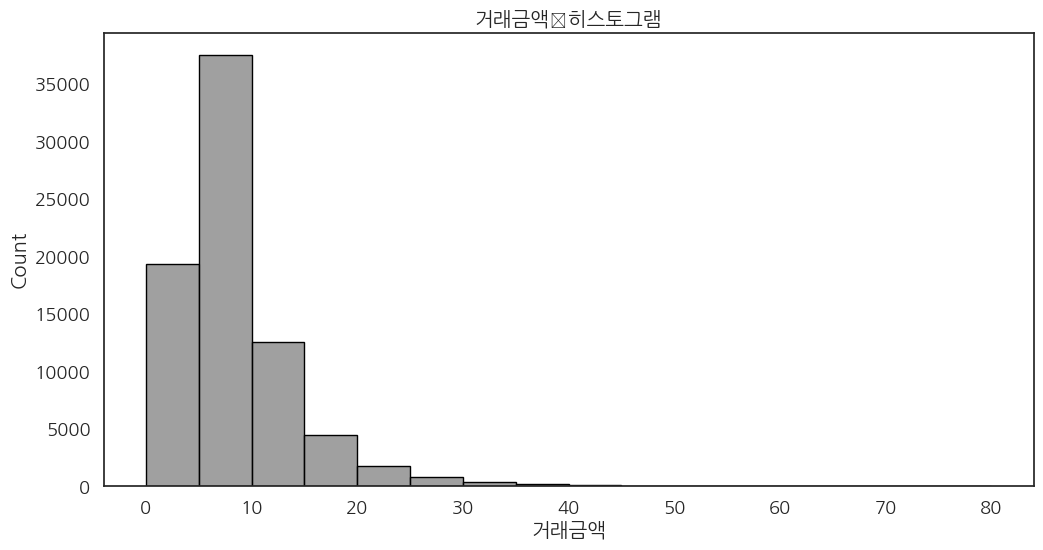

In [92]:
# 히스토그램은 일변량 연속형 데이터의 분포(도수분포표)를 시각화한 것입니다.
sns.histplot(data = apt, 
             x = '거래금액', 
             bins = bins,
             color = '0.5',
             edgecolor = 'black',)
plt.title('거래금액 히스토그램')
plt.show()

In [93]:
# 자치구별 평균 거래금액을 계산하여 데이터프레임으로 생성합니다.
siggMean = apt \
>> group_by(X['시군구']) \
>> summarize(평균금액 = X['거래금액'].mean()) \
>> mutate(평균금액 = X['평균금액'].round(2)) \
>> ungroup() \
>> arrange(X['평균금액'], ascending = False)

In [94]:
# 자치구별 평균 거래금액 데이터프레임의 인덱스를 초기화합니다.
siggMean = siggMean.reset_index(drop = True)

In [95]:
# 자치구별 평균 거래금액을 처음 10행만 출력합니다.
siggMean.head(10)

,시군구,평균금액
0,강남구,17.92
1,서초구,17.22
2,용산구,15.04
3,송파구,13.09
4,성동구,11.31
5,광진구,10.75
6,마포구,10.27
7,동작구,9.81
8,중구,9.37
9,양천구,8.93


In [96]:
# 강남구, 서초구, 용산구, 송파구 등 4개 자치구만 선택하여 top4를 생성합니다.
top4 = apt >> filter_by(X['시군구'].str.contains('강남|서초|용산|송파'))

In [97]:
# 상위 4개 자치구 데이터프레임의 정보를 확인합니다.
top4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12130 entries, 2468 to 77079
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   아파트     12130 non-null  object        
 1   시도      12130 non-null  object        
 2   시군구     12130 non-null  object        
 3   읍면동     12130 non-null  object        
 4   지번      12130 non-null  object        
 5   거래일     12130 non-null  datetime64[ns]
 6   전용면적    12130 non-null  float64       
 7   층       12130 non-null  int64         
 8   거래금액    12130 non-null  float64       
 9   단위금액    12130 non-null  float64       
 10  금액구분    12130 non-null  object        
 11  주소      12130 non-null  object        
 12  ID      12130 non-null  int64         
 13  아파트명    12130 non-null  object        
 14  지번주소    12130 non-null  object        
 15  세대수     12130 non-null  int64         
 16  임대수     12130 non-null  int64         
 17  동수      12130 non-null  int64         
 18  용적률

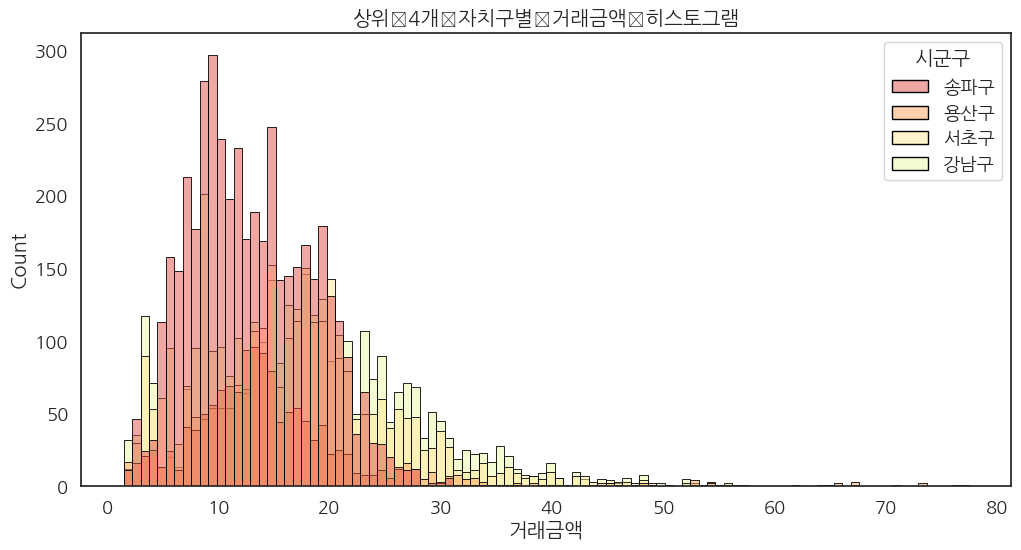

In [98]:
# 특정 열의 값에 따라 히스토그램을 여러 개 겹쳐서 그릴 수 있습니다.
sns.histplot(data = top4, 
             x = '거래금액', 
             hue = '시군구', 
             bins = 100,
             edgecolor = 'black')
plt.title('상위 4개 자치구별 거래금액 히스토그램')
plt.show()

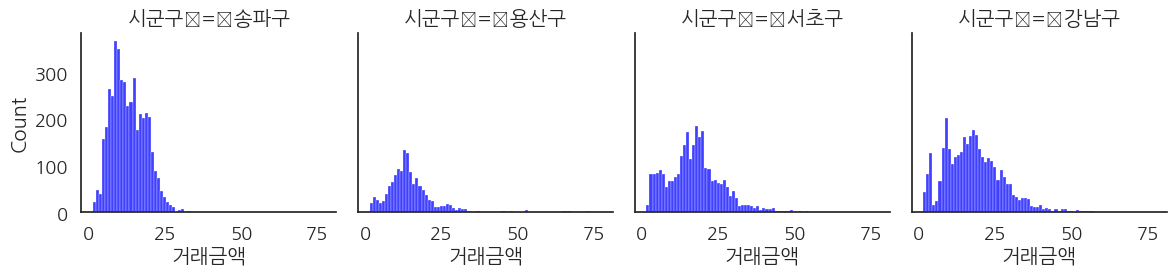

In [99]:
# 특정 열의 값에 따라 히스토그램을 나누어서 그릴 수 있습니다.
sns.displot(data = top4, 
            x = '거래금액', 
            col = '시군구', 
            binwidth = 1,
            color = 'blue', 
            height = 3)
plt.show()

## 상자수염그림 그리기

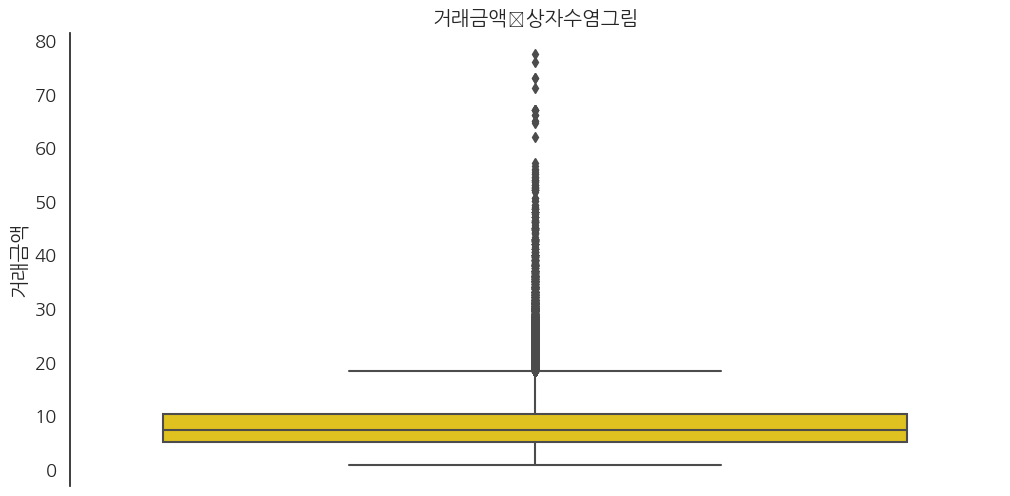

In [100]:
# 상자수염그림은 연속형 데이터의 사분위수와 이상치를 시각화한 것입니다.
sns.boxplot(y = '거래금액', 
            data = apt, 
            color = 'gold')
sns.despine(bottom = True)
plt.title('거래금액 상자수염그림')
plt.xticks([1], [''])
plt.show()

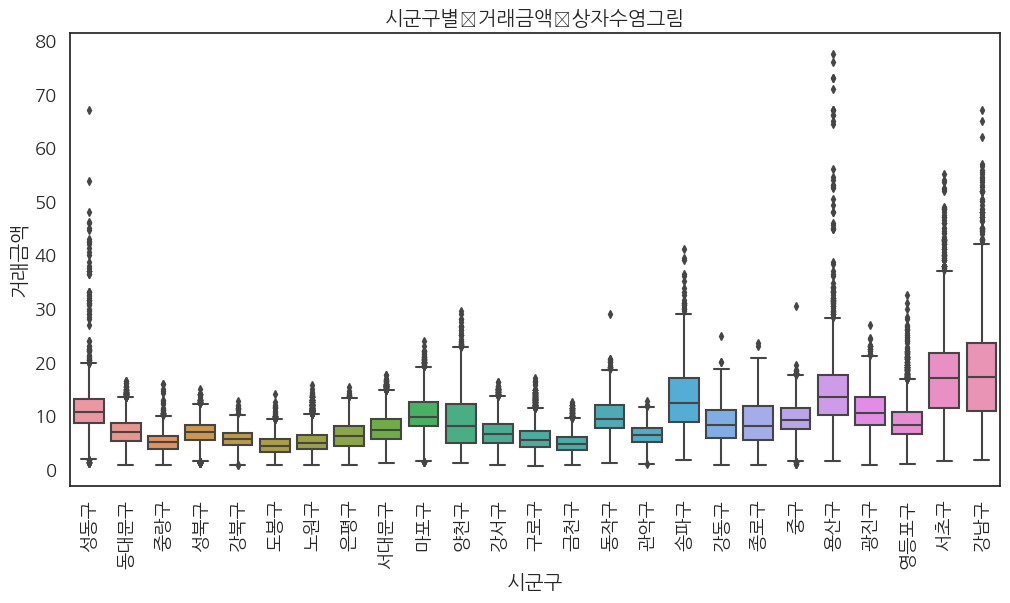

In [101]:
# 집단별 상자수염그림을 그리면, 여러 집단의 분포를 한 눈에 비교할 수 있습니다.
sns.boxplot(x = '시군구', 
            y = '거래금액', 
            data = apt, 
            fliersize = 4)
plt.title('시군구별 거래금액 상자수염그림')
plt.xticks(rotation = 90)
plt.show()

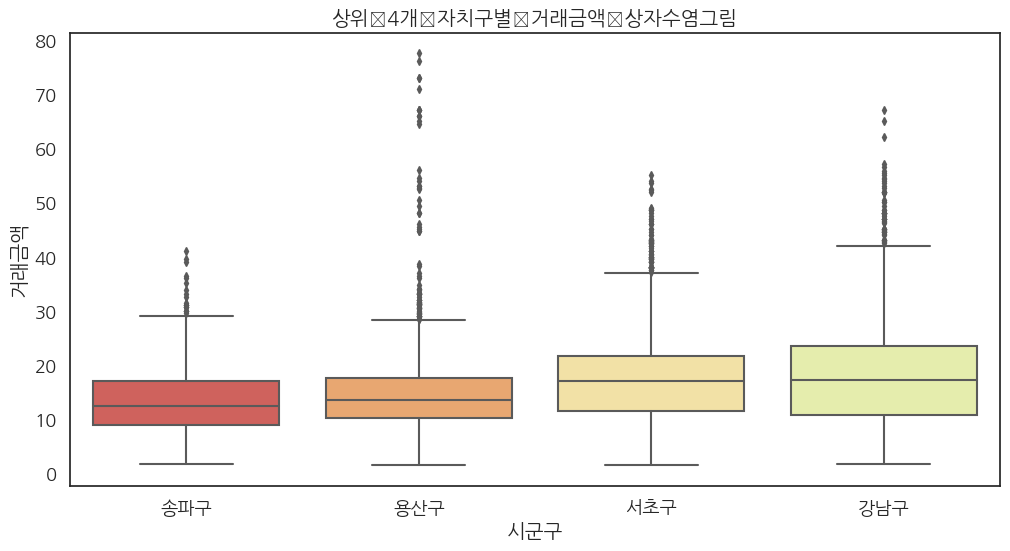

In [102]:
# 상위 4개 자치구별 상자수염그림을 그립니다.
sns.boxplot(x = '시군구', 
            y = '거래금액', 
            data = top4, 
            fliersize = 4)
plt.title('상위 4개 자치구별 거래금액 상자수염그림')
plt.xticks(rotation = 0)
plt.show()

## 막대그래프 그리기

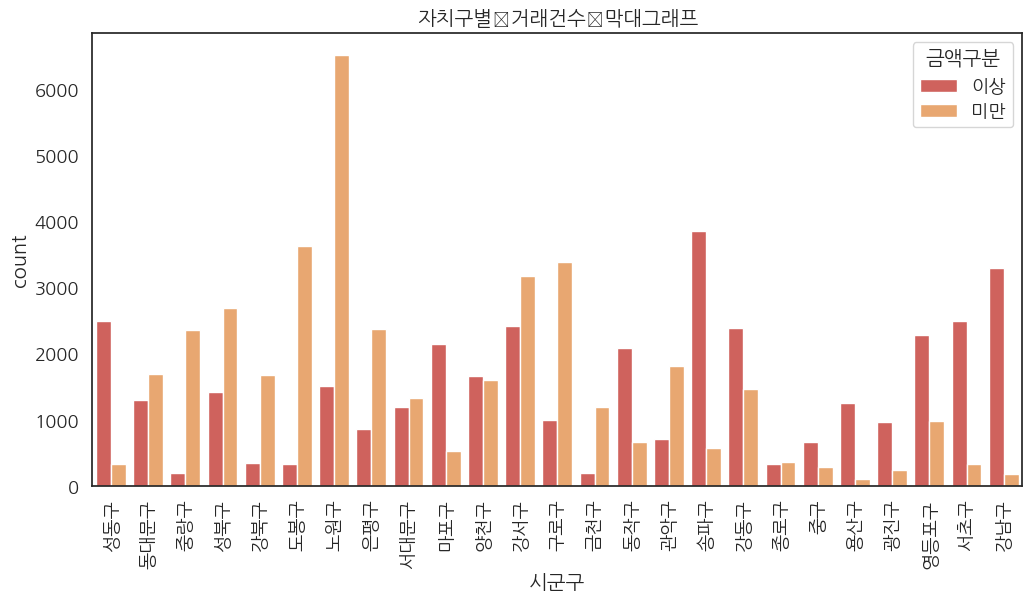

In [103]:
# 일변량 막대그래프는 명목형 데이터의 빈도수를 막대로 시각화한 것입니다.
sns.countplot(x = '시군구', 
              data = apt, 
              hue = '금액구분')
plt.title('자치구별 거래건수 막대그래프')
plt.xticks(rotation = 90)
plt.show()

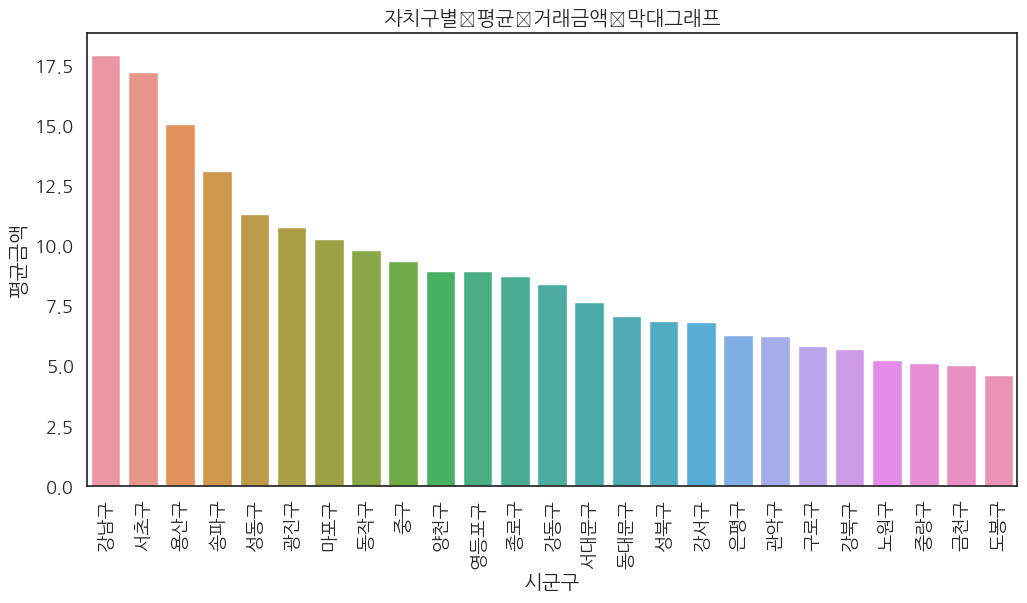

In [104]:
# 이변량 막대그래프는 명목형 데이터에 따라 연속형 데이터의 크기를 표현합니다.
sns.barplot(x = '시군구', 
            y = '평균금액', 
            data = siggMean)
plt.title('자치구별 평균 거래금액 막대그래프')
plt.xticks(rotation = 90)
plt.show()

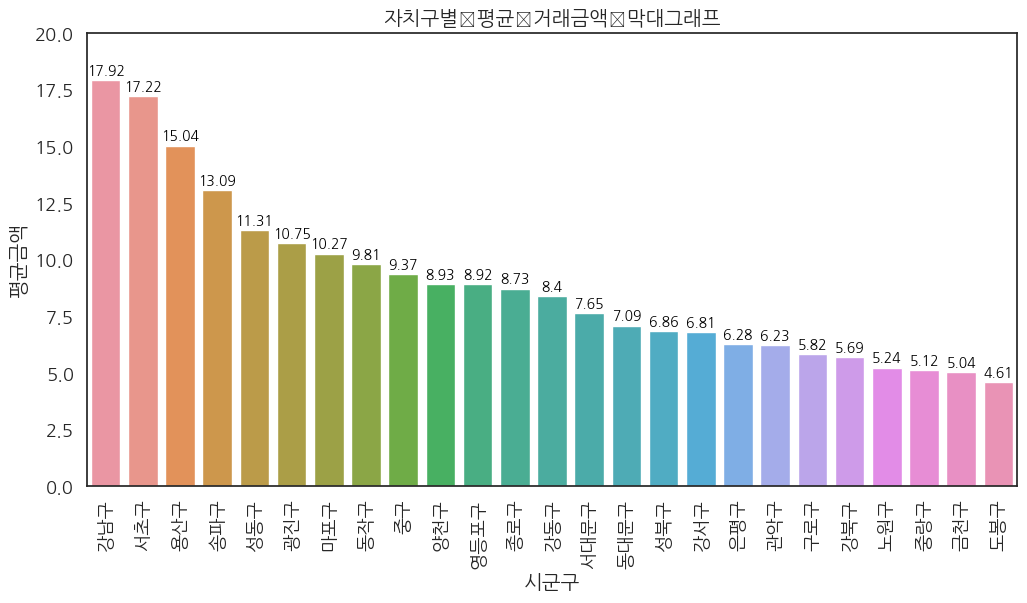

In [105]:
# 막대그래프 위에 숫자를 텍스트로 추가합니다.
sns.barplot(x = '시군구', y = '평균금액', data = siggMean)

for index, row in siggMean.iterrows():
    plt.text(x = index, y = row.평균금액 + 0.1, s = row.평균금액, 
             fontsize = 10, ha = 'center', va = 'bottom', c = 'black')

plt.title('자치구별 평균 거래금액 막대그래프')
plt.xticks(rotation = 90)
plt.ylim(0, 20)
plt.show()

## 선그래프

In [106]:
# 선그래프를 그리기 위해 먼저 apt에 거래월 컬럼을 생성합니다.
apt['거래월'] = apt['거래일'].dt.month

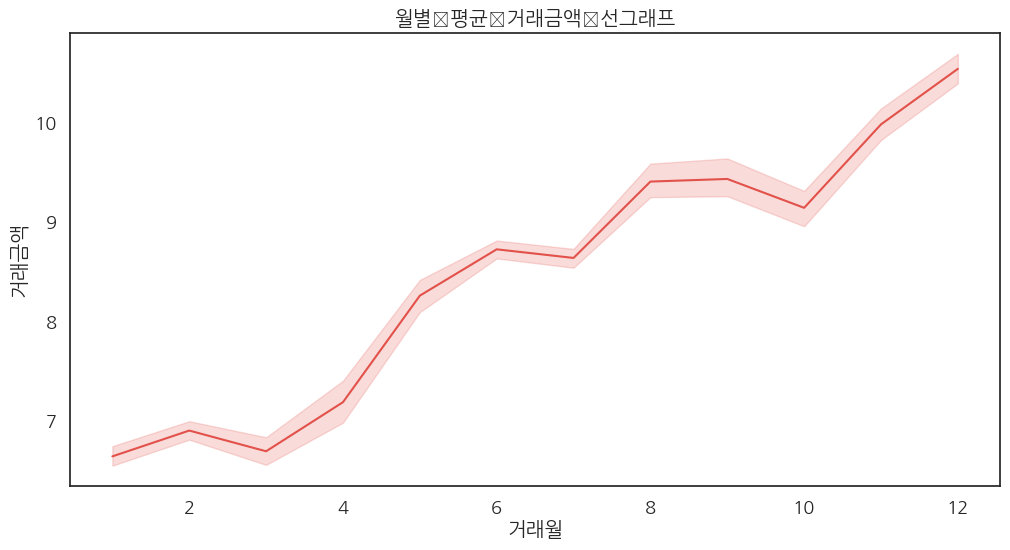

In [107]:
# 월별 거래금액의 평균을 선그래프로 그립니다.
sns.lineplot(x = '거래월', y = '거래금액', data = apt)
plt.title('월별 평균 거래금액 선그래프')
plt.show()

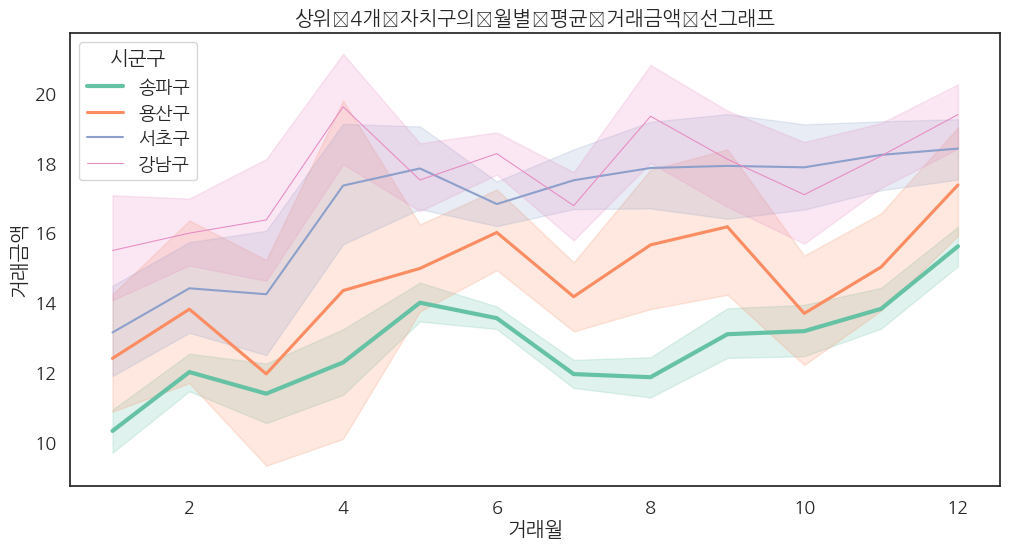

In [108]:
# 특정 열의 값에 따라 선그래프를 겹쳐서 그릴 수 있습니다.
top4['거래월'] = top4['거래일'].dt.month
sns.lineplot(x = '거래월', 
             y = '거래금액', 
             data = top4, 
             hue = '시군구', 
             palette = 'Set2', 
             size = '시군구')
plt.title('상위 4개 자치구의 월별 평균 거래금액 선그래프')
plt.show()

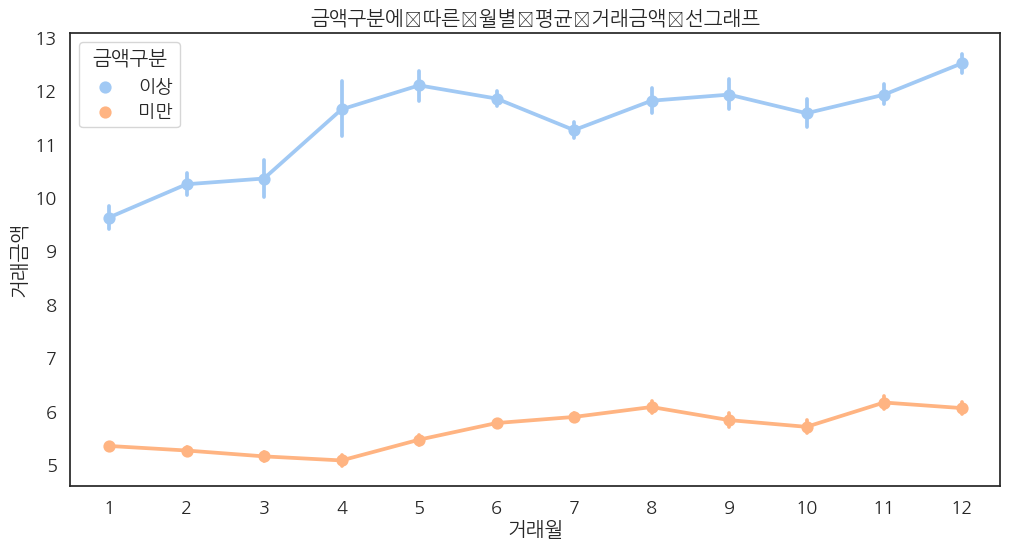

In [109]:
# 선그래프에 점을 추가한 그래프를 그립니다.
sns.pointplot(x = '거래월', 
              y = '거래금액', 
              data = apt, 
              hue = '금액구분',
              palette = 'pastel')
plt.title('금액구분에 따른 월별 평균 거래금액 선그래프')
plt.show()

## 산점도 그리기

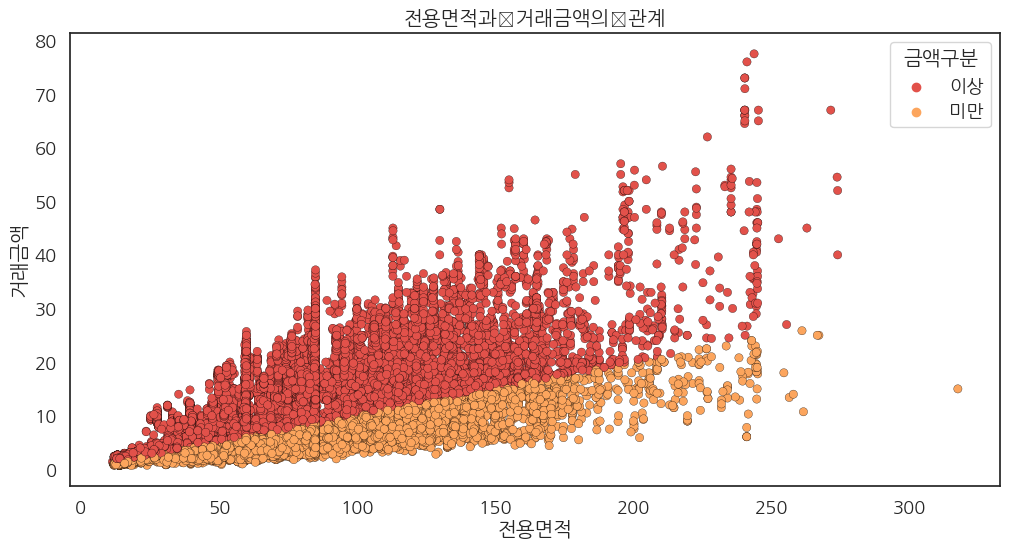

In [110]:
# 산점도는 이변량 연속형 데이터 간 상관관계를 시각화한 것입니다.
sns.scatterplot(x = '전용면적', 
                y = '거래금액', 
                data = apt,
                hue = '금액구분',
                color = 'gold', 
                edgecolor = 'black', 
                linewidth = 0.2)
plt.title('전용면적과 거래금액의 관계')
plt.show()

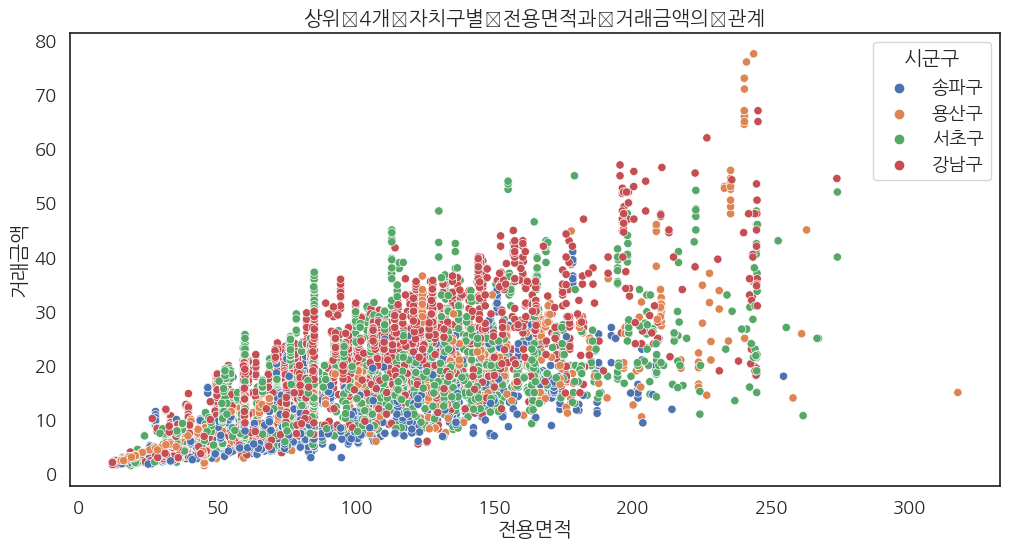

In [111]:
# 특정 열의 값에 따라 산점도를 겹쳐서 그릴 수 있습니다.
sns.scatterplot(x = '전용면적', 
                y = '거래금액', 
                data = top4, 
                hue = '시군구', 
                palette = 'deep',
                edgecolor = 'white')
plt.title('상위 4개 자치구별 전용면적과 거래금액의 관계')
plt.show()

## 산점도 행렬 그리기

In [112]:
# 산점도 행렬을 그릴 숫자 컬럼을 일부만 선택합니다. (5~6개가 적당합니다.)
top4_1 = top4 >> select(['시군구', '거래금액', '전용면적', '층', '세대수', '용적률'])

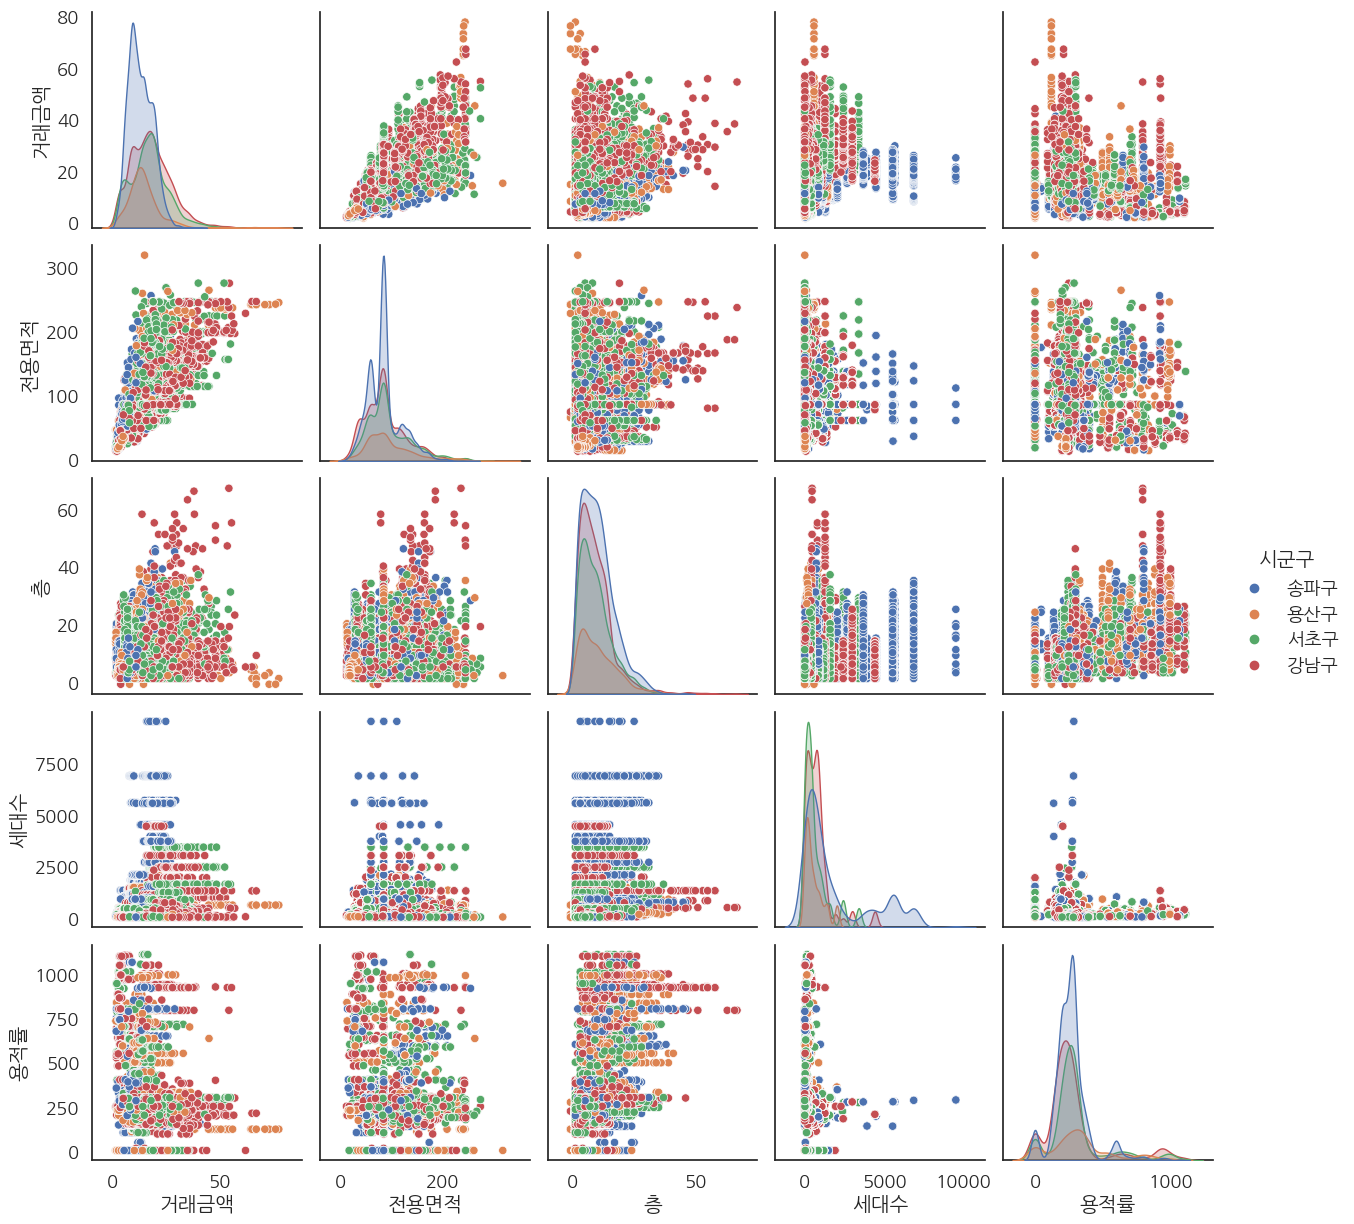

In [113]:
# 모든 숫자 컬럼으로 산점도 행렬을 그립니다.
sns.pairplot(data = top4_1, hue = '시군구', palette = 'deep')
plt.show()

---